# 활용 데이터

#### 1.[상권영역] 서울시 상권분석서비스(영역-상권) 2023.10월 기준
- commer_district_finish.csv

#### 2.[개폐업 수] 서울시 상권분석서비스(점포-상권), 
+[프랜차이즈 수] 서울시 상권분석서비스(점포-상권) 2019~2022 기준
- fran_openclose_finish.csv

#### 3.[매출금액] 서울시 상권분석서비스(추정매출-상권) 2019~2022 기준
- money_finish.csv

#### 4.[길단위인구 수] 서울시 상권분석서비스(길단위인구-상권) 2019~2022 기준
- moving_people_finish.csv

- 위 concat 전처리를 한 파일은 ./data_finish 폴더 안에 있음.

In [6]:
# 필요한 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [7]:
# 한글 폰트 깨짐 현상 해결(jupyter notebook)
plt.rcParams['font.family'] = 'Malgun Gothic'
# 마이너스 부호 출력 설정
plt.rcParams['axes.unicode_minus']=False

# 한글 폰트 깨짐 현상 해결(Colab)

## 1.상권영역 데이터 불러오기
- 서울시 상권영역: 1650개 (2023년 기준)


In [8]:
# 상권영역 데이터 파일 읽어오기
commer_district = pd.read_csv('./data_finish/commer_district_finish.csv')
commer_district

,상권_코드,상권_코드_명
0,3110008,배화여자대학교(박노수미술관)
1,3110009,자하문터널
2,3110010,평창동서측
3,3110017,정독도서관
4,3110018,중앙고등학교
...,...,...
1645,3001492,명동 남대문 북창동 다동 무교동 관광특구
1646,3001493,동대문패션타운 관광특구
1647,3001494,종로?청계 관광특구
1648,3001495,잠실 관광특구


## 2.개폐업수 데이터 불러오기
- 2019~2022 프랜차이즈수, 개폐업수 합친 파일


In [10]:
# 프랜차이즈수, 개폐업수 파일 전부 읽어오기
fran_openclose = pd.read_csv('./data_finish/fran_openclose_finish.csv')
fran_openclose

,기준_년분기_코드,상권_구분_코드,상권_구분_코드_명,상권_코드,상권_코드_명,서비스_업종_코드,서비스_업종_코드_명,점포_수,유사_업종_점포_수,개업_율,개업_점포_수,폐업_률,폐업_점포_수,프랜차이즈_점포_수
0,20191,R,전통시장,3130018,동대문문구완구거리(동대문문구완구시장),CS300043,전자상거래업,10,10,10,1,0,0,0
1,20191,D,발달상권,3120165,서래마을카페거리(서래마을),CS100007,치킨전문점,0,1,0,0,100,1,1
2,20191,D,발달상권,3120177,신논현역 1번,CS300015,가방,3,3,0,0,0,0,0
3,20191,A,골목상권,3110508,서연중학교,CS200041,사진관,6,6,17,1,0,0,0
4,20191,A,골목상권,3110241,먹골역 5번,CS300036,조명용품,2,2,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1207977,20224,A,골목상권,3110631,방화초등학교,CS200038,독서실,0,0,0,0,0,1,0
1207978,20224,A,골목상권,3110954,국기원,CS200010,변호사사무소,0,0,0,0,0,1,0
1207979,20224,A,골목상권,3110687,"천왕역 3번(오류2동주민센터, 서울오류남초등학교)",CS100008,분식전문점,0,0,0,0,0,1,0
1207980,20224,R,전통시장,3130054,황학동주방가구거리상점가,CS200034,여관,0,0,0,0,0,1,0


## 3. 매출액 데이터 불러오기
- 2019~2022 매출액 합친 파일


In [11]:
# 매출액 파일 전부 읽어오기
money = pd.read_csv('./data_finish/money_finish.csv')
money

,기준_년분기_코드,상권_구분_코드,상권_구분_코드_명,상권_코드,상권_코드_명,서비스_업종_코드,서비스_업종_코드_명,당월_매출_금액,당월_매출_건수,주중_매출_금액,...,시간대_건수~21_매출_건수,시간대_건수~24_매출_건수,남성_매출_건수,여성_매출_건수,연령대_10_매출_건수,연령대_20_매출_건수,연령대_30_매출_건수,연령대_40_매출_건수,연령대_50_매출_건수,연령대_60_이상_매출_건수
0,20191,D,발달상권,3120037,동대문역사문화공원역,CS200029,네일숍,20393290,208,17051978,...,86,27,0,208,0,56,21,0,123,8
1,20191,U,관광특구,3001492,명동 남대문 북창동 다동 무교동 관광특구,CS200029,네일숍,73147711,2136,57025458,...,1270,35,59,2077,0,715,995,236,157,33
2,20191,A,골목상권,3110085,경리단길남측,CS200029,네일숍,3000000,40,2337081,...,14,9,0,40,0,8,28,5,0,0
3,20191,A,골목상권,3110166,구의1동주민센터,CS200029,네일숍,8443798,153,4984275,...,64,13,13,140,0,52,88,13,0,0
4,20191,A,골목상권,3110161,중곡역 3번,CS200029,네일숍,20756990,305,16694436,...,196,36,4,301,0,79,28,68,91,39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323787,20224,R,전통시장,3130051,동화동 골목형상점가,CS100010,커피-음료,74566607,11618,46002960,...,811,56,4239,7016,41,1539,2107,2831,2696,2037
323788,20224,A,골목상권,3110121,한양대역 4번,CS100010,커피-음료,496341232,74976,343713652,...,22056,9747,37372,37498,6632,45799,6409,5767,9168,1094
323789,20224,A,골목상권,3110163,성자초등학교,CS100010,커피-음료,60999234,10668,39994099,...,2205,349,5054,5440,212,2459,2483,2900,1459,980
323790,20224,A,골목상권,3110110,상왕십리역 6번,CS100010,커피-음료,35826724,4681,17309483,...,361,0,1811,2870,0,1966,1784,672,155,104


In [12]:
# 모든 칼럼이 보이지 않아서 칼럼을 바꿈
money.transpose()

,0,1,2,3,4,5,6,7,8,9,...,323782,323783,323784,323785,323786,323787,323788,323789,323790,323791
기준_년분기_코드,20191,20191,20191,20191,20191,20191,20191,20191,20191,20191,...,20224,20224,20224,20224,20224,20224,20224,20224,20224,20224
상권_구분_코드,D,U,A,A,A,D,R,A,D,A,...,D,R,A,D,A,R,A,A,A,D
상권_구분_코드_명,발달상권,관광특구,골목상권,골목상권,골목상권,발달상권,전통시장,골목상권,발달상권,골목상권,...,발달상권,전통시장,골목상권,발달상권,골목상권,전통시장,골목상권,골목상권,골목상권,발달상권
상권_코드,3120037,3001492,3110085,3110166,3110161,3120072,3130147,3110438,3120158,3110850,...,3120024,3130182,3110591,3120056,3110043,3130051,3110121,3110163,3110110,3120065
상권_코드_명,동대문역사문화공원역,명동 남대문 북창동 다동 무교동 관광특구,경리단길남측,구의1동주민센터,중곡역 3번,성신여대,쌍문역동측상점가,경춘선숲길 우측,녹두거리(대학동),사당역 10번,...,회현역,영천시장,충정로역 6번,구의역,충무초등학교,동화동 골목형상점가,한양대역 4번,성자초등학교,상왕십리역 6번,회기역
서비스_업종_코드,CS200029,CS200029,CS200029,CS200029,CS200029,CS200029,CS200029,CS200029,CS200029,CS200029,...,CS100010,CS200001,CS100010,CS100010,CS100010,CS100010,CS100010,CS100010,CS100010,CS100010
서비스_업종_코드_명,네일숍,네일숍,네일숍,네일숍,네일숍,네일숍,네일숍,네일숍,네일숍,네일숍,...,커피-음료,일반교습학원,커피-음료,커피-음료,커피-음료,커피-음료,커피-음료,커피-음료,커피-음료,커피-음료
당월_매출_금액,20393290,73147711,3000000,8443798,20756990,122719691,11384929,3542727,27950110,25952543,...,663360129,3287672,23208485,717270334,126493832,74566607,496341232,60999234,35826724,340596205
당월_매출_건수,208,2136,40,153,305,1931,173,55,380,548,...,45590,16,5104,111612,22085,11618,74976,10668,4681,67496
주중_매출_금액,17051978,57025458,2337081,4984275,16694436,89162313,9896703,2448866,14764854,18495846,...,559002499,1643836,18042474,515200032,108671002,46002960,343713652,39994099,17309483,206793777


## 4. 유동인구수 데이터 불러오기
- 2019~2022 유동인구수 데이터만 남기고 2023년도꺼는 삭제한 데이터셋임.


In [13]:
# 유동인구수 파일 읽어오기
moving_people = pd.read_csv('./data_finish/moving_people_finish.csv')
moving_people

,기준_년분기_코드,상권_구분_코드,상권_구분_코드_명,상권_코드,상권_코드_명,총_유동인구_수,남성_유동인구_수,여성_유동인구_수,연령대_10_유동인구_수,연령대_20_유동인구_수,...,시간대_14_17_유동인구_수,시간대_17_21_유동인구_수,시간대_21_24_유동인구_수,월요일_유동인구_수,화요일_유동인구_수,수요일_유동인구_수,목요일_유동인구_수,금요일_유동인구_수,토요일_유동인구_수,일요일_유동인구_수
0,20224,U,관광특구,3001496,강남 마이스 관광특구,113561,56267,57295,8423,23526,...,27583,24323,6411,15349,17220,18047,18597,18288,13967,12091
1,20224,U,관광특구,3001495,잠실 관광특구,4179934,2015767,2164168,490222,895245,...,692222,918306,473577,571728,588228,595830,598401,615406,633869,576473
2,20224,U,관광특구,3001494,종로?청계 관광특구,8657826,4693188,3964638,334742,1500979,...,1861965,1729022,685015,1272457,1381468,1386192,1396528,1396973,1047401,776808
3,20224,U,관광특구,3001493,동대문패션타운 관광특구,3418870,1617046,1801825,182494,618819,...,512176,587790,412248,520582,540938,546081,547095,512377,377450,374347
4,20224,U,관광특구,3001492,명동 남대문 북창동 다동 무교동 관광특구,7629595,3717728,3911867,365427,1301955,...,1851308,1478804,408233,1103048,1241705,1251450,1267499,1240066,864591,661235
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26394,20191,A,골목상권,3110005,세검정,129171,55368,73803,19624,15305,...,13667,21367,20706,18686,18746,18727,18736,18576,17782,17918
26395,20191,A,골목상권,3110004,대신고등학교,495628,226246,269381,94335,57494,...,70258,94736,65414,69892,70158,71562,71577,70647,70556,71236
26396,20191,A,골목상권,3110003,세검정초등학교,706686,310470,396215,128431,82037,...,74478,96768,85012,100783,100429,100067,99815,98912,102760,103921
26397,20191,A,골목상권,3110002,독립문역 1번,540585,246868,293717,96885,65609,...,75590,96631,70361,76301,77283,79044,78826,78583,75041,75508


In [15]:
moving_people.transpose()

,0,1,2,3,4,5,6,7,8,9,...,26389,26390,26391,26392,26393,26394,26395,26396,26397,26398
기준_년분기_코드,20224,20224,20224,20224,20224,20224,20224,20224,20224,20224,...,20191,20191,20191,20191,20191,20191,20191,20191,20191,20191
상권_구분_코드,U,U,U,U,U,U,R,R,R,R,...,A,A,A,A,A,A,A,A,A,A
상권_구분_코드_명,관광특구,관광특구,관광특구,관광특구,관광특구,관광특구,전통시장,전통시장,전통시장,전통시장,...,골목상권,골목상권,골목상권,골목상권,골목상권,골목상권,골목상권,골목상권,골목상권,골목상권
상권_코드,3001496,3001495,3001494,3001493,3001492,3001491,3130327,3130326,3130325,3130324,...,3110010,3110009,3110008,3110007,3110006,3110005,3110004,3110003,3110002,3110001
상권_코드_명,강남 마이스 관광특구,잠실 관광특구,종로?청계 관광특구,동대문패션타운 관광특구,명동 남대문 북창동 다동 무교동 관광특구,이태원 관광특구,"평화시장(남평화시장, 제일평화시장, 신평화패션타운)",고덕 골목형상점가,명일전통시장,길동복조리시장,...,평창동서측,자하문터널,배화여자대학교(박노수미술관),사직공원(한국사회과학도서관),부암동주민센터,세검정,대신고등학교,세검정초등학교,독립문역 1번,이북5도청사
총_유동인구_수,113561,4179934,8657826,3418870,7629595,2161642,62192,147922,296251,555117,...,243528,188048,1577188,581385,21363,129171,495628,706686,540585,155680
남성_유동인구_수,56267,2015767,4693188,1617046,3717728,1085212,29346,68449,130055,251495,...,100741,87427,672613,257684,9858,55368,226246,310470,246868,68432
여성_유동인구_수,57295,2164168,3964638,1801825,3911867,1076430,32848,79473,166196,303620,...,142787,100622,904573,323701,11505,73803,269381,396215,293717,87248
연령대_10_유동인구_수,8423,490222,334742,182494,365427,141845,2326,29457,53697,86062,...,36996,26330,290718,121015,3160,19624,94335,128431,96885,27743
연령대_20_유동인구_수,23526,895245,1500979,618819,1301955,531363,9614,13415,30849,61442,...,24990,24437,206254,63921,2691,15305,57494,82037,65609,15216


## 음식점/소매업 파생변수 전처리 (진행중)
- 서비스_업종_코드_명의 특정 열의 중복 항목을 제거하여 104만 8574개의 행을 101개로 줄이기
- 101개의 데이터 중 음식점과 소매업을 분류하여 각각 파생변수 생성

In [16]:
# 프랜차이즈, 개폐업수 데이터셋 컬럼 확인
fran_openclose.head()

,기준_년분기_코드,상권_구분_코드,상권_구분_코드_명,상권_코드,상권_코드_명,서비스_업종_코드,서비스_업종_코드_명,점포_수,유사_업종_점포_수,개업_율,개업_점포_수,폐업_률,폐업_점포_수,프랜차이즈_점포_수
0,20191,R,전통시장,3130018,동대문문구완구거리(동대문문구완구시장),CS300043,전자상거래업,10,10,10,1,0,0,0
1,20191,D,발달상권,3120165,서래마을카페거리(서래마을),CS100007,치킨전문점,0,1,0,0,100,1,1
2,20191,D,발달상권,3120177,신논현역 1번,CS300015,가방,3,3,0,0,0,0,0
3,20191,A,골목상권,3110508,서연중학교,CS200041,사진관,6,6,17,1,0,0,0
4,20191,A,골목상권,3110241,먹골역 5번,CS300036,조명용품,2,2,0,0,0,0,0


In [17]:
# 데이터셋이 12만개의 행과 11개의 열로 이루어짐을 확인
fran_openclose.shape

(1207982, 14)

In [18]:
# 액셀을 통해 중복되는 업종명을 제거하여 101개로 줄이고, 그중 음식점을 분류
# 음식점코드명은 총 10개
food1 = fran_openclose[fran_openclose['서비스_업종_코드_명'] == '치킨전문점']
food2 = fran_openclose[fran_openclose['서비스_업종_코드_명'] == '한식음식점']
food3 = fran_openclose[fran_openclose['서비스_업종_코드_명'] == '양식음식점']
food4 = fran_openclose[fran_openclose['서비스_업종_코드_명'] == '호프-간이주점']
food5 = fran_openclose[fran_openclose['서비스_업종_코드_명'] == '분식전문점']
food6 = fran_openclose[fran_openclose['서비스_업종_코드_명'] == '중식음식점']
food7 = fran_openclose[fran_openclose['서비스_업종_코드_명'] == '커피-음료']
food8 = fran_openclose[fran_openclose['서비스_업종_코드_명'] == '제과점']
food9 = fran_openclose[fran_openclose['서비스_업종_코드_명'] == '패스트푸드점']
food10 = fran_openclose[fran_openclose['서비스_업종_코드_명'] == '일식음식점']

food = pd.concat([food1,food2,food3,food4,food5,food6,food7,food8,food9,food10])

# 음식점_프랜차이즈 수 칼럼은 19만개로 이루어져있음을 확인
food.shape

(193983, 14)

In [19]:
# 음식점_프랜차이즈_점포_수를 제외한 필요없는 열 삭제 (상권코드~서비스업종코드명은 남겨놓고)
food.drop(food.columns[7:13], axis=1, inplace=True)

# 열 이름 변경
food = food.rename(columns={'프랜차이즈_점포_수':'음식점_프랜차이즈_점포_수'})
food.to_csv('food.csv')

# food dataset 확인
food

,기준_년분기_코드,상권_구분_코드,상권_구분_코드_명,상권_코드,상권_코드_명,서비스_업종_코드,서비스_업종_코드_명,음식점_프랜차이즈_점포_수
1,20191,D,발달상권,3120165,서래마을카페거리(서래마을),CS100007,치킨전문점,1
116,20191,R,전통시장,3130303,영동전통시장,CS100007,치킨전문점,1
162,20191,D,발달상권,3120003,광화문역,CS100007,치킨전문점,3
192,20191,A,골목상권,3110925,서초중학교,CS100007,치킨전문점,2
375,20191,R,전통시장,3130148,방학동도깨비시장,CS100007,치킨전문점,0
...,...,...,...,...,...,...,...,...
1207662,20224,A,골목상권,3110179,광나루역 1번,CS100003,일식음식점,0
1207703,20224,A,골목상권,3110329,우리은행체육관,CS100003,일식음식점,0
1207764,20224,A,골목상권,3110561,상수역 4번,CS100003,일식음식점,0
1207909,20224,R,전통시장,3130101,답십리현대시장,CS100003,일식음식점,0


In [20]:
# 새로운 파생변수 생성
food_fran = pd.merge(fran_openclose, food, on=['기준_년분기_코드', 
                                               '상권_구분_코드', 
                                               '상권_구분_코드_명', 
                                               '상권_코드', 
                                               '상권_코드_명', 
                                               '서비스_업종_코드_명', 
                                               '서비스_업종_코드'], how='outer' )
food_fran

,기준_년분기_코드,상권_구분_코드,상권_구분_코드_명,상권_코드,상권_코드_명,서비스_업종_코드,서비스_업종_코드_명,점포_수,유사_업종_점포_수,개업_율,개업_점포_수,폐업_률,폐업_점포_수,프랜차이즈_점포_수,음식점_프랜차이즈_점포_수
0,20191,R,전통시장,3130018,동대문문구완구거리(동대문문구완구시장),CS300043,전자상거래업,10,10,10,1,0,0,0,NaN
1,20191,D,발달상권,3120165,서래마을카페거리(서래마을),CS100007,치킨전문점,0,1,0,0,100,1,1,1.0
2,20191,D,발달상권,3120177,신논현역 1번,CS300015,가방,3,3,0,0,0,0,0,NaN
3,20191,A,골목상권,3110508,서연중학교,CS200041,사진관,6,6,17,1,0,0,0,NaN
4,20191,A,골목상권,3110241,먹골역 5번,CS300036,조명용품,2,2,0,0,0,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1207977,20224,A,골목상권,3110631,방화초등학교,CS200038,독서실,0,0,0,0,0,1,0,NaN
1207978,20224,A,골목상권,3110954,국기원,CS200010,변호사사무소,0,0,0,0,0,1,0,NaN
1207979,20224,A,골목상권,3110687,"천왕역 3번(오류2동주민센터, 서울오류남초등학교)",CS100008,분식전문점,0,0,0,0,0,1,0,0.0
1207980,20224,R,전통시장,3130054,황학동주방가구거리상점가,CS200034,여관,0,0,0,0,0,1,0,NaN


In [21]:
# 음식점 프랜차이즈 점포수가 float형식이므로 int형으로 바꿔주기
food_fran['음식점_프랜차이즈_점포_수'] = food_fran['음식점_프랜차이즈_점포_수'].astype('Int64')
food_fran.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1207982 entries, 0 to 1207981
Data columns (total 15 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   기준_년분기_코드       1207982 non-null  int64 
 1   상권_구분_코드        1207982 non-null  object
 2   상권_구분_코드_명      1207982 non-null  object
 3   상권_코드           1207982 non-null  int64 
 4   상권_코드_명         1207982 non-null  object
 5   서비스_업종_코드       1207982 non-null  object
 6   서비스_업종_코드_명     1207982 non-null  object
 7   점포_수            1207982 non-null  int64 
 8   유사_업종_점포_수      1207982 non-null  int64 
 9   개업_율            1207982 non-null  int64 
 10  개업_점포_수         1207982 non-null  int64 
 11  폐업_률            1207982 non-null  int64 
 12  폐업_점포_수         1207982 non-null  int64 
 13  프랜차이즈_점포_수      1207982 non-null  int64 
 14  음식점_프랜차이즈_점포_수  193983 non-null   Int64 
dtypes: Int64(1), int64(9), object(5)
memory usage: 148.6+ MB


In [22]:
# 음식점 프랜차이즈 점포수 파생변수 추가 성공!! int형임!!
food_fran

,기준_년분기_코드,상권_구분_코드,상권_구분_코드_명,상권_코드,상권_코드_명,서비스_업종_코드,서비스_업종_코드_명,점포_수,유사_업종_점포_수,개업_율,개업_점포_수,폐업_률,폐업_점포_수,프랜차이즈_점포_수,음식점_프랜차이즈_점포_수
0,20191,R,전통시장,3130018,동대문문구완구거리(동대문문구완구시장),CS300043,전자상거래업,10,10,10,1,0,0,0,<NA>
1,20191,D,발달상권,3120165,서래마을카페거리(서래마을),CS100007,치킨전문점,0,1,0,0,100,1,1,1
2,20191,D,발달상권,3120177,신논현역 1번,CS300015,가방,3,3,0,0,0,0,0,<NA>
3,20191,A,골목상권,3110508,서연중학교,CS200041,사진관,6,6,17,1,0,0,0,<NA>
4,20191,A,골목상권,3110241,먹골역 5번,CS300036,조명용품,2,2,0,0,0,0,0,<NA>
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1207977,20224,A,골목상권,3110631,방화초등학교,CS200038,독서실,0,0,0,0,0,1,0,<NA>
1207978,20224,A,골목상권,3110954,국기원,CS200010,변호사사무소,0,0,0,0,0,1,0,<NA>
1207979,20224,A,골목상권,3110687,"천왕역 3번(오류2동주민센터, 서울오류남초등학교)",CS100008,분식전문점,0,0,0,0,0,1,0,0
1207980,20224,R,전통시장,3130054,황학동주방가구거리상점가,CS200034,여관,0,0,0,0,0,1,0,<NA>


In [21]:
# 새로만든 food_fran은 칼럼이 하나 추가된것을 확인할 수 있음.
print(food_fran.shape)
print(fran_openclose.shape)

(1207982, 15)
(1207982, 14)


In [22]:
# 이제 반대로 소매업 프랜차이즈 점포수 파생변수 생성하기
# isin() 메서드는 제공된 목록에 열 값이 있는지 확인하고 ~는 조건을 부정하므로 리스트 안의 값과 일치하지 않는 행을 선택함.
somaeup = food_fran[~food_fran['서비스_업종_코드_명'].isin(['치킨전문점', 
                                                    '한식음식점',             
                                                    '양식음식점',
                                                    '호프-간이주점',                 
                                                    '분식전문점',                  
                                                    '중식음식점',                     
                                                    '커피-음료',                         
                                                    '제과점',                  
                                                    '패스트푸드점',                     
                                                    '일식음식점'])]

# 소매업_프랜차이즈 수 칼럼은 19만개로 이루어져있음을 확인
somaeup.shape

# 아까 소매업의 칼럼은 (193983, 14) 이었으므로, 1207982에서 193938을 빼면 1013999가 맞다.
# 따라서 소매업은 잘 분리되었다.

(1013999, 15)

In [23]:
somaeup

,기준_년분기_코드,상권_구분_코드,상권_구분_코드_명,상권_코드,상권_코드_명,서비스_업종_코드,서비스_업종_코드_명,점포_수,유사_업종_점포_수,개업_율,개업_점포_수,폐업_률,폐업_점포_수,프랜차이즈_점포_수,음식점_프랜차이즈_점포_수
0,20191,R,전통시장,3130018,동대문문구완구거리(동대문문구완구시장),CS300043,전자상거래업,10,10,10,1,0,0,0,<NA>
2,20191,D,발달상권,3120177,신논현역 1번,CS300015,가방,3,3,0,0,0,0,0,<NA>
3,20191,A,골목상권,3110508,서연중학교,CS200041,사진관,6,6,17,1,0,0,0,<NA>
4,20191,A,골목상권,3110241,먹골역 5번,CS300036,조명용품,2,2,0,0,0,0,0,<NA>
5,20191,A,골목상권,3110643,강서구다솔마을,CS300018,의약품,1,1,0,0,0,0,0,<NA>
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1207976,20224,A,골목상권,3111032,방이역 1번,CS200006,일반의원,0,0,0,0,0,1,0,<NA>
1207977,20224,A,골목상권,3110631,방화초등학교,CS200038,독서실,0,0,0,0,0,1,0,<NA>
1207978,20224,A,골목상권,3110954,국기원,CS200010,변호사사무소,0,0,0,0,0,1,0,<NA>
1207980,20224,R,전통시장,3130054,황학동주방가구거리상점가,CS200034,여관,0,0,0,0,0,1,0,<NA>


In [24]:
# 음식점_프랜차이즈_점포_수를 제외한 필요없는 열 삭제 (상권코드~서비스업종코드명은 남겨놓고)
somaeup.drop(somaeup.columns[7:13], axis=1, inplace=True)
somaeup.drop(somaeup.columns[-1], axis=1, inplace=True)
somaeup

# 열 이름 변경
somaeup = somaeup.rename(columns={'프랜차이즈_점포_수':'소매업_프랜차이즈_점포_수'})
somaeup.to_csv('somaeup.csv')

# food dataset 확인
somaeup

C:\Users\214594\AppData\Local\Temp\ipykernel_33032\2876740076.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  somaeup.drop(somaeup.columns[7:13], axis=1, inplace=True)
C:\Users\214594\AppData\Local\Temp\ipykernel_33032\2876740076.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  somaeup.drop(somaeup.columns[-1], axis=1, inplace=True)


,기준_년분기_코드,상권_구분_코드,상권_구분_코드_명,상권_코드,상권_코드_명,서비스_업종_코드,서비스_업종_코드_명,소매업_프랜차이즈_점포_수
0,20191,R,전통시장,3130018,동대문문구완구거리(동대문문구완구시장),CS300043,전자상거래업,0
2,20191,D,발달상권,3120177,신논현역 1번,CS300015,가방,0
3,20191,A,골목상권,3110508,서연중학교,CS200041,사진관,0
4,20191,A,골목상권,3110241,먹골역 5번,CS300036,조명용품,0
5,20191,A,골목상권,3110643,강서구다솔마을,CS300018,의약품,0
...,...,...,...,...,...,...,...,...
1207976,20224,A,골목상권,3111032,방이역 1번,CS200006,일반의원,0
1207977,20224,A,골목상권,3110631,방화초등학교,CS200038,독서실,0
1207978,20224,A,골목상권,3110954,국기원,CS200010,변호사사무소,0
1207980,20224,R,전통시장,3130054,황학동주방가구거리상점가,CS200034,여관,0


In [25]:
# 새로운 파생변수 생성
food_fran_somae = pd.merge(food_fran, somaeup, on=['기준_년분기_코드', 
                                               '상권_구분_코드', 
                                               '상권_구분_코드_명', 
                                               '상권_코드', 
                                               '상권_코드_명', 
                                               '서비스_업종_코드_명', 
                                               '서비스_업종_코드'], how='outer' )
food_fran_somae

,기준_년분기_코드,상권_구분_코드,상권_구분_코드_명,상권_코드,상권_코드_명,서비스_업종_코드,서비스_업종_코드_명,점포_수,유사_업종_점포_수,개업_율,개업_점포_수,폐업_률,폐업_점포_수,프랜차이즈_점포_수,음식점_프랜차이즈_점포_수,소매업_프랜차이즈_점포_수
0,20191,R,전통시장,3130018,동대문문구완구거리(동대문문구완구시장),CS300043,전자상거래업,10,10,10,1,0,0,0,<NA>,0.0
1,20191,D,발달상권,3120165,서래마을카페거리(서래마을),CS100007,치킨전문점,0,1,0,0,100,1,1,1,NaN
2,20191,D,발달상권,3120177,신논현역 1번,CS300015,가방,3,3,0,0,0,0,0,<NA>,0.0
3,20191,A,골목상권,3110508,서연중학교,CS200041,사진관,6,6,17,1,0,0,0,<NA>,0.0
4,20191,A,골목상권,3110241,먹골역 5번,CS300036,조명용품,2,2,0,0,0,0,0,<NA>,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1207977,20224,A,골목상권,3110631,방화초등학교,CS200038,독서실,0,0,0,0,0,1,0,<NA>,0.0
1207978,20224,A,골목상권,3110954,국기원,CS200010,변호사사무소,0,0,0,0,0,1,0,<NA>,0.0
1207979,20224,A,골목상권,3110687,"천왕역 3번(오류2동주민센터, 서울오류남초등학교)",CS100008,분식전문점,0,0,0,0,0,1,0,0,NaN
1207980,20224,R,전통시장,3130054,황학동주방가구거리상점가,CS200034,여관,0,0,0,0,0,1,0,<NA>,0.0


In [26]:
# 소매업 프랜차이즈 점포수가 float형식이므로 int형으로 바꿔주기
food_fran_somae['소매업_프랜차이즈_점포_수'] = food_fran_somae['소매업_프랜차이즈_점포_수'].astype('Int64')
food_fran_somae.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1207982 entries, 0 to 1207981
Data columns (total 16 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   기준_년분기_코드       1207982 non-null  int64 
 1   상권_구분_코드        1207982 non-null  object
 2   상권_구분_코드_명      1207982 non-null  object
 3   상권_코드           1207982 non-null  int64 
 4   상권_코드_명         1207982 non-null  object
 5   서비스_업종_코드       1207982 non-null  object
 6   서비스_업종_코드_명     1207982 non-null  object
 7   점포_수            1207982 non-null  int64 
 8   유사_업종_점포_수      1207982 non-null  int64 
 9   개업_율            1207982 non-null  int64 
 10  개업_점포_수         1207982 non-null  int64 
 11  폐업_률            1207982 non-null  int64 
 12  폐업_점포_수         1207982 non-null  int64 
 13  프랜차이즈_점포_수      1207982 non-null  int64 
 14  음식점_프랜차이즈_점포_수  193983 non-null   Int64 
 15  소매업_프랜차이즈_점포_수  1013999 non-null  Int64 
dtypes: Int64(2), int64(9), object(5)
memory usage: 159.0+ 

## 데이터 전처리 5 (진행중)
- 10대~20대 유동인구수를 묶어 젊은층 유동인구수라는 파생변수 생성

In [27]:
moving_people

,기준_년분기_코드,상권_구분_코드,상권_구분_코드_명,상권_코드,상권_코드_명,총_유동인구_수,남성_유동인구_수,여성_유동인구_수,연령대_10_유동인구_수,연령대_20_유동인구_수,...,시간대_14_17_유동인구_수,시간대_17_21_유동인구_수,시간대_21_24_유동인구_수,월요일_유동인구_수,화요일_유동인구_수,수요일_유동인구_수,목요일_유동인구_수,금요일_유동인구_수,토요일_유동인구_수,일요일_유동인구_수
4947,20224,U,관광특구,3001496,강남 마이스 관광특구,113561,56267,57295,8423,23526,...,27583,24323,6411,15349,17220,18047,18597,18288,13967,12091
4948,20224,U,관광특구,3001495,잠실 관광특구,4179934,2015767,2164168,490222,895245,...,692222,918306,473577,571728,588228,595830,598401,615406,633869,576473
4949,20224,U,관광특구,3001494,종로?청계 관광특구,8657826,4693188,3964638,334742,1500979,...,1861965,1729022,685015,1272457,1381468,1386192,1396528,1396973,1047401,776808
4950,20224,U,관광특구,3001493,동대문패션타운 관광특구,3418870,1617046,1801825,182494,618819,...,512176,587790,412248,520582,540938,546081,547095,512377,377450,374347
4951,20224,U,관광특구,3001492,명동 남대문 북창동 다동 무교동 관광특구,7629595,3717728,3911867,365427,1301955,...,1851308,1478804,408233,1103048,1241705,1251450,1267499,1240066,864591,661235
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31341,20191,A,골목상권,3110005,세검정,129171,55368,73803,19624,15305,...,13667,21367,20706,18686,18746,18727,18736,18576,17782,17918
31342,20191,A,골목상권,3110004,대신고등학교,495628,226246,269381,94335,57494,...,70258,94736,65414,69892,70158,71562,71577,70647,70556,71236
31343,20191,A,골목상권,3110003,세검정초등학교,706686,310470,396215,128431,82037,...,74478,96768,85012,100783,100429,100067,99815,98912,102760,103921
31344,20191,A,골목상권,3110002,독립문역 1번,540585,246868,293717,96885,65609,...,75590,96631,70361,76301,77283,79044,78826,78583,75041,75508


In [28]:
moving_people['청년층_유동인구_수'] = moving_people['연령대_20_유동인구_수'] + moving_people['연령대_30_유동인구_수']
moving_people['중년층_유동인구_수'] = moving_people['연령대_40_유동인구_수'] + moving_people['연령대_50_유동인구_수']
moving_people['평일_유동인구_수'] = moving_people['월요일_유동인구_수'] + moving_people['화요일_유동인구_수'] + moving_people['수요일_유동인구_수'] + moving_people['목요일_유동인구_수'] + moving_people['금요일_유동인구_수']
moving_people['주말_유동인구_수'] = moving_people['토요일_유동인구_수'] + moving_people['일요일_유동인구_수']
moving_people.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26399 entries, 4947 to 31345
Data columns (total 31 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   기준_년분기_코드         26399 non-null  int64 
 1   상권_구분_코드          26399 non-null  object
 2   상권_구분_코드_명        26399 non-null  object
 3   상권_코드             26399 non-null  int64 
 4   상권_코드_명           26399 non-null  object
 5   총_유동인구_수          26399 non-null  int64 
 6   남성_유동인구_수         26399 non-null  int64 
 7   여성_유동인구_수         26399 non-null  int64 
 8   연령대_10_유동인구_수     26399 non-null  int64 
 9   연령대_20_유동인구_수     26399 non-null  int64 
 10  연령대_30_유동인구_수     26399 non-null  int64 
 11  연령대_40_유동인구_수     26399 non-null  int64 
 12  연령대_50_유동인구_수     26399 non-null  int64 
 13  연령대_60_이상_유동인구_수  26399 non-null  int64 
 14  시간대_00_06_유동인구_수  26399 non-null  int64 
 15  시간대_06_11_유동인구_수  26399 non-null  int64 
 16  시간대_11_14_유동인구_수  26399 non-null  int64 
 17  시간대_14_17

## 데이터 전처리 6
- 모든 데이터셋 합치기(2019~2022 기준 개폐업수,프랜차이즈수,유동인구수,매출액을 전체 컬럼으로) 

In [29]:
money_fran = pd.merge(money, food_fran_somae, on=['기준_년분기_코드', '상권_구분_코드', '상권_구분_코드_명', '상권_코드', '상권_코드_명', '서비스_업종_코드_명', '서비스_업종_코드'], how='outer' )
money_fran

,기준_년분기_코드,상권_구분_코드,상권_구분_코드_명,상권_코드,상권_코드_명,서비스_업종_코드,서비스_업종_코드_명,당월_매출_금액,당월_매출_건수,주중_매출_금액,...,연령대_60_이상_매출_건수,점포_수,유사_업종_점포_수,개업_율,개업_점포_수,폐업_률,폐업_점포_수,프랜차이즈_점포_수,음식점_프랜차이즈_점포_수,소매업_프랜차이즈_점포_수
0,20191,D,발달상권,3120037,동대문역사문화공원역,CS200029,네일숍,20393290.0,208.0,17051978.0,...,8.0,5,5,20,1,0,0,0,<NA>,0
1,20191,U,관광특구,3001492,명동 남대문 북창동 다동 무교동 관광특구,CS200029,네일숍,73147711.0,2136.0,57025458.0,...,33.0,24,25,4,1,0,0,1,<NA>,1
2,20191,A,골목상권,3110085,경리단길남측,CS200029,네일숍,3000000.0,40.0,2337081.0,...,0.0,3,3,33,1,0,0,0,<NA>,0
3,20191,A,골목상권,3110166,구의1동주민센터,CS200029,네일숍,8443798.0,153.0,4984275.0,...,0.0,3,3,0,0,33,1,0,<NA>,0
4,20191,A,골목상권,3110161,중곡역 3번,CS200029,네일숍,20756990.0,305.0,16694436.0,...,39.0,3,3,0,0,0,0,0,<NA>,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1207977,20224,A,골목상권,3110631,방화초등학교,CS200038,독서실,NaN,NaN,NaN,...,NaN,0,0,0,0,0,1,0,<NA>,0
1207978,20224,A,골목상권,3110954,국기원,CS200010,변호사사무소,NaN,NaN,NaN,...,NaN,0,0,0,0,0,1,0,<NA>,0
1207979,20224,A,골목상권,3110687,"천왕역 3번(오류2동주민센터, 서울오류남초등학교)",CS100008,분식전문점,NaN,NaN,NaN,...,NaN,0,0,0,0,0,1,0,0,<NA>
1207980,20224,R,전통시장,3130054,황학동주방가구거리상점가,CS200034,여관,NaN,NaN,NaN,...,NaN,0,0,0,0,0,1,0,<NA>,0


In [30]:
df = pd.merge(money_fran, moving_people, on=['기준_년분기_코드', '상권_구분_코드', '상권_구분_코드_명', '상권_코드', '상권_코드_명'], how='outer' )

# 전체 데이터셋 저장하기.(모든 float형 데이터를 int형으로 바꾸기 전)
df.to_csv('dataset.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1208030 entries, 0 to 1208029
Data columns (total 90 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   기준_년분기_코드         1208030 non-null  int64  
 1   상권_구분_코드          1208030 non-null  object 
 2   상권_구분_코드_명        1208030 non-null  object 
 3   상권_코드             1208030 non-null  int64  
 4   상권_코드_명           1208030 non-null  object 
 5   서비스_업종_코드         1207982 non-null  object 
 6   서비스_업종_코드_명       1207982 non-null  object 
 7   당월_매출_금액          323792 non-null   float64
 8   당월_매출_건수          323792 non-null   float64
 9   주중_매출_금액          323792 non-null   float64
 10  주말_매출_금액          323792 non-null   float64
 11  월요일_매출_금액         323792 non-null   float64
 12  화요일_매출_금액         323792 non-null   float64
 13  수요일_매출_금액         323792 non-null   float64
 14  목요일_매출_금액         323792 non-null   float64
 15  금요일_매출_금액         323792 non-null   float64
 16  

money

In [65]:
df.transpose()

,0,1,2,3,4,5,6,7,8,9,...,1208020,1208021,1208022,1208023,1208024,1208025,1208026,1208027,1208028,1208029
기준_년분기_코드,20191,20191,20191,20191,20191,20191,20191,20191,20191,20191,...,20194,20193,20193,20193,20192,20192,20192,20191,20191,20191
상권_구분_코드,D,D,D,D,D,D,D,D,D,D,...,R,U,R,R,U,R,R,U,R,R
상권_구분_코드_명,발달상권,발달상권,발달상권,발달상권,발달상권,발달상권,발달상권,발달상권,발달상권,발달상권,...,전통시장,관광특구,전통시장,전통시장,관광특구,전통시장,전통시장,관광특구,전통시장,전통시장
상권_코드,3120037,3120037,3120037,3120037,3120037,3120037,3120037,3120037,3120037,3120037,...,3130016,3001494,3130239,3130016,3001494,3130239,3130016,3001494,3130239,3130016
상권_코드_명,동대문역사문화공원역,동대문역사문화공원역,동대문역사문화공원역,동대문역사문화공원역,동대문역사문화공원역,동대문역사문화공원역,동대문역사문화공원역,동대문역사문화공원역,동대문역사문화공원역,동대문역사문화공원역,...,동대문상가B동,종로?청계 관광특구,양남시장,동대문상가B동,종로?청계 관광특구,양남시장,동대문상가B동,종로?청계 관광특구,양남시장,동대문상가B동
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
일요일_유동인구_수,427082.0,427082.0,427082.0,427082.0,427082.0,427082.0,427082.0,427082.0,427082.0,427082.0,...,6923.0,891868.0,2909.0,6982.0,949441.0,2839.0,8380.0,968348.0,3012.0,8204.0
청년층_유동인구_수,1580831.0,1580831.0,1580831.0,1580831.0,1580831.0,1580831.0,1580831.0,1580831.0,1580831.0,1580831.0,...,23525.0,3793892.0,9658.0,22987.0,3856139.0,9153.0,27525.0,3975793.0,9329.0,26574.0
중년층_유동인구_수,1284764.0,1284764.0,1284764.0,1284764.0,1284764.0,1284764.0,1284764.0,1284764.0,1284764.0,1284764.0,...,26150.0,3554486.0,8357.0,25436.0,3823147.0,8156.0,31309.0,3778614.0,8460.0,28669.0
평일_유동인구_수,2912071.0,2912071.0,2912071.0,2912071.0,2912071.0,2912071.0,2912071.0,2912071.0,2912071.0,2912071.0,...,52524.0,8182388.0,18886.0,50870.0,8536978.0,18180.0,61901.0,8543560.0,18948.0,57231.0


In [66]:
money

,기준_년분기_코드,상권_구분_코드,상권_구분_코드_명,상권_코드,상권_코드_명,서비스_업종_코드,서비스_업종_코드_명,당월_매출_금액,당월_매출_건수,주중_매출_금액,...,시간대_건수~21_매출_건수,시간대_건수~24_매출_건수,남성_매출_건수,여성_매출_건수,연령대_10_매출_건수,연령대_20_매출_건수,연령대_30_매출_건수,연령대_40_매출_건수,연령대_50_매출_건수,연령대_60_이상_매출_건수
0,20191,D,발달상권,3120037,동대문역사문화공원역,CS200029,네일숍,20393290,208,17051978,...,86,27,0,208,0,56,21,0,123,8
1,20191,U,관광특구,3001492,명동 남대문 북창동 다동 무교동 관광특구,CS200029,네일숍,73147711,2136,57025458,...,1270,35,59,2077,0,715,995,236,157,33
2,20191,A,골목상권,3110085,경리단길남측,CS200029,네일숍,3000000,40,2337081,...,14,9,0,40,0,8,28,5,0,0
3,20191,A,골목상권,3110166,구의1동주민센터,CS200029,네일숍,8443798,153,4984275,...,64,13,13,140,0,52,88,13,0,0
4,20191,A,골목상권,3110161,중곡역 3번,CS200029,네일숍,20756990,305,16694436,...,196,36,4,301,0,79,28,68,91,39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83568,20224,R,전통시장,3130051,동화동 골목형상점가,CS100010,커피-음료,74566607,11618,46002960,...,811,56,4239,7016,41,1539,2107,2831,2696,2037
83569,20224,A,골목상권,3110121,한양대역 4번,CS100010,커피-음료,496341232,74976,343713652,...,22056,9747,37372,37498,6632,45799,6409,5767,9168,1094
83570,20224,A,골목상권,3110163,성자초등학교,CS100010,커피-음료,60999234,10668,39994099,...,2205,349,5054,5440,212,2459,2483,2900,1459,980
83571,20224,A,골목상권,3110110,상왕십리역 6번,CS100010,커피-음료,35826724,4681,17309483,...,361,0,1811,2870,0,1966,1784,672,155,104


## 결측치 제거
- 결측값이 있는 행(상권) 모두 제거 ?
- 상권별 프랜차이즈 점포수, 음식점, 소매점 5개 미만인 행(상권) 제거 ?

In [31]:
# 결측치 존재 확인
df.isnull().sum().sum()

43690388

In [32]:
#칼럼별 결측치 확인
df.isnull().sum(axis = 0)

기준_년분기_코드        0
상권_구분_코드         0
상권_구분_코드_명       0
상권_코드            0
상권_코드_명          0
              ... 
일요일_유동인구_수    1479
청년층_유동인구_수    1479
중년층_유동인구_수    1479
평일_유동인구_수     1479
주말_유동인구_수     1479
Length: 90, dtype: int64

In [33]:
# 보통 결측치를 전부 제거하는지?
# 1. 결측치가 있는 행 전부 제거


# 2. 평균값, 중위값, 최빈값으로 결측치 대체

In [34]:
# # [디스트플롯(Distplot) : 히스토그램과 커널 밀도 추정 그래프(kdeplot)을 통합하여 보여주는 그래프] 예시!

# # 그래프 크기 저장
# plt.figure(figsize=(10,6))

# # 디스트플롯(distplot) 생성
# sns.distplot(x=train_data['w_disp_cnt'])

# # 그래프 제목 지정
# plt.title(['w_disp_cnt 분포'])
# plt.show()

# # 그래프 크기 저장
# plt.figure(figsize=(10,6))

# # 디스트플롯(distplot) 생성 -> 10건 이하로 한정해서 그리기
# sns.distplot(x=train_data[train_data['w_disp_cnt'] < 10]['w_disp_cnt'])

# # 그래프 제목 지정
# plt.title(['w_disp_cnt 분포'])
# plt.show()

In [35]:
# # df.fillna('대체값', inplace = True)
# train_data['w_disp_cnt'].fillna(train_data['w_disp_cnt'].median(), inplace = True)

# # 결측치 제거 결과 확인
# train_data.isnull().sum().sum(), test_data.isnull().sum().sum()

## 이상치 대체
- 박스플롯 그려서 이상치 있는지 확인하고 제거하기
- 그런데 오히려 이상치가 필요하지 않나? 젠트리피케이션을 확인하려면?

In [61]:
column_a = food_fran_somae['음식점_프랜차이즈_점포_수']
column_a

column_b = food_fran_somae['소매업_프랜차이즈_점포_수']
column_b

column_c = moving_people['평일_유동인구_수']
column_c

column_d = moving_people['주말_유동인구_수']
column_d

column_e = df['주중_매출_금액']
column_e

column_f = df['주말_매출_금액']
column_f

0            3341312.0
1          260799622.0
2                  0.0
3          481107307.0
4           17601555.0
              ...     
1208025            NaN
1208026            NaN
1208027            NaN
1208028            NaN
1208029            NaN
Name: 주말_매출_금액, Length: 1208030, dtype: float64

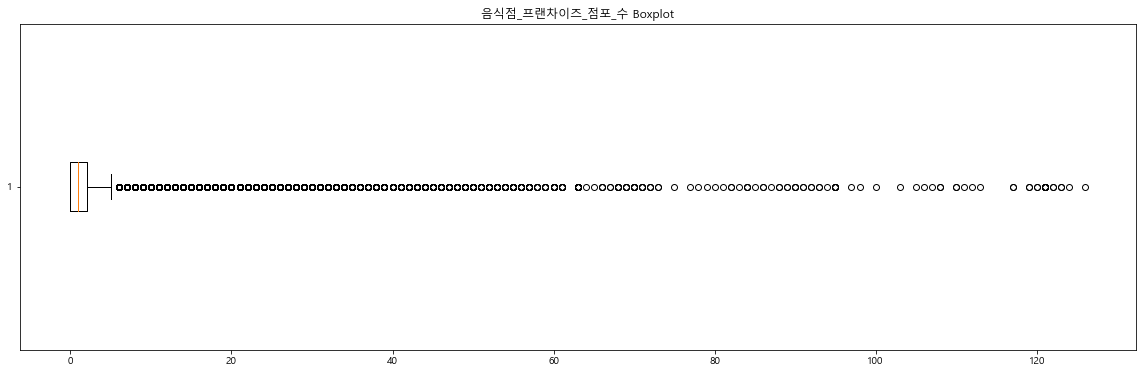

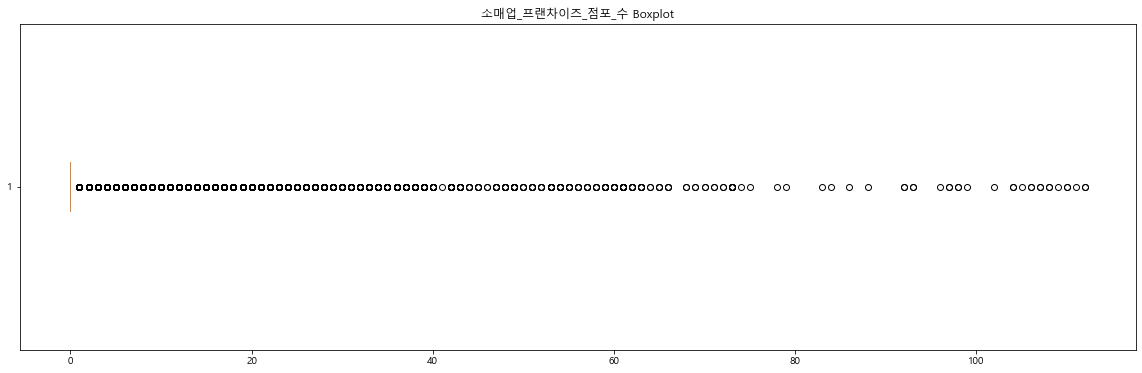

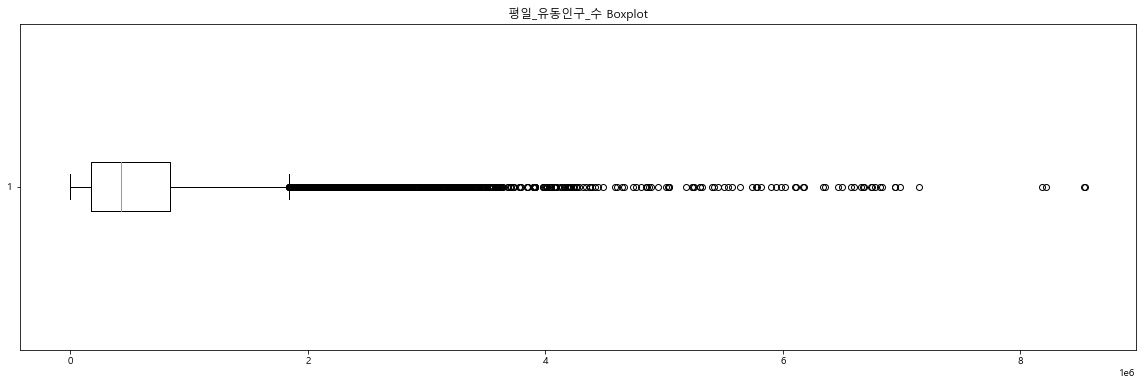

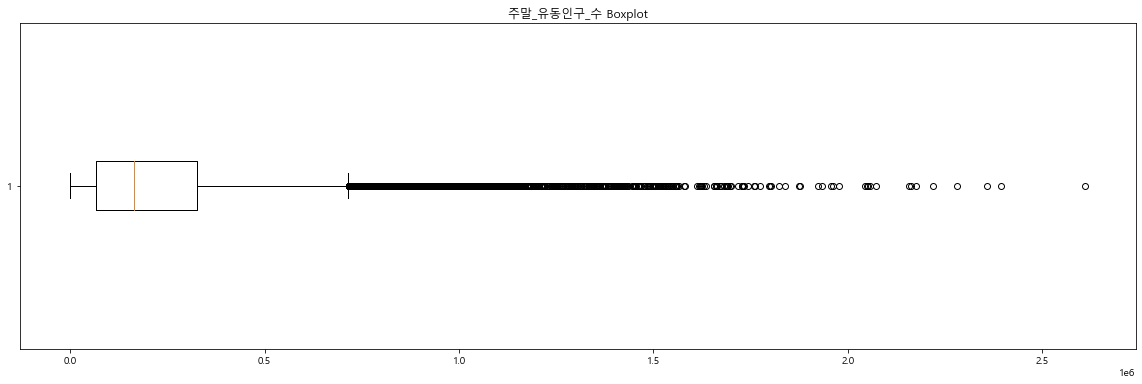

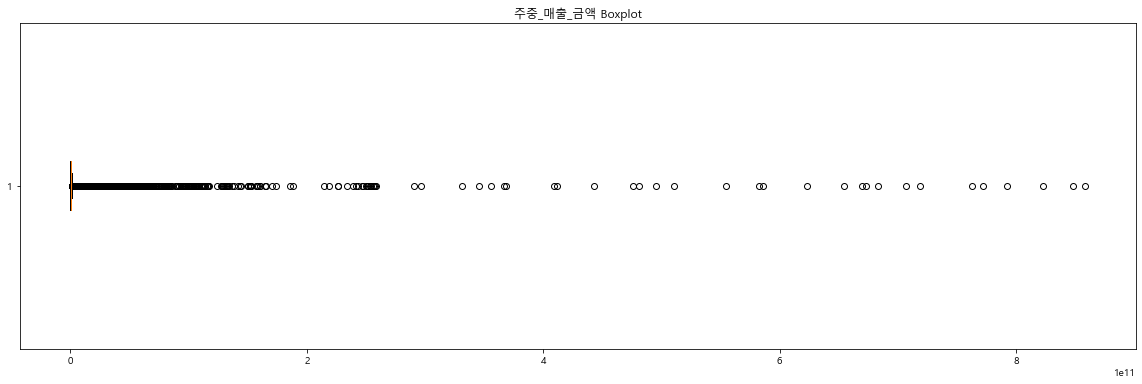

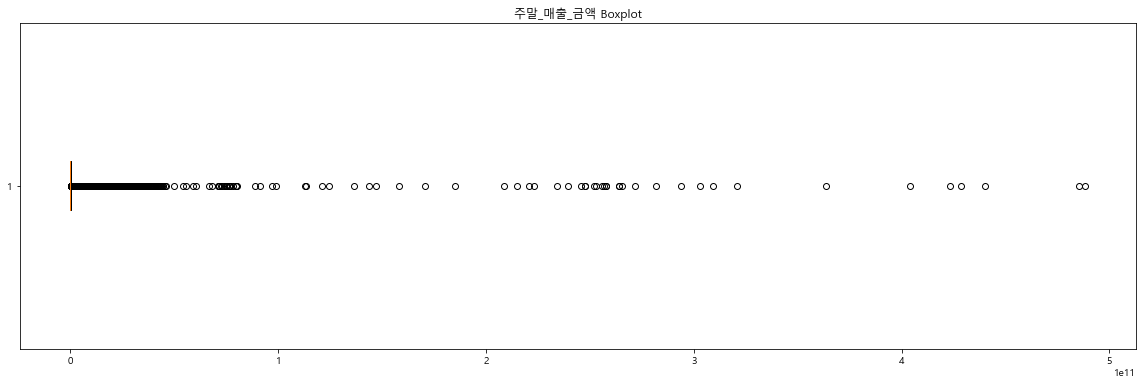

In [64]:
cleaned_data = column_a.dropna()
plt.figure(figsize=(20, 6))
plt.boxplot(cleaned_data, vert=False)  # 수평 박스플롯
plt.title('음식점_프랜차이즈_점포_수 Boxplot')
plt.show()

cleaned_data = column_b.dropna()
plt.figure(figsize=(20, 6))
plt.boxplot(cleaned_data, vert=False)  # 수평 박스플롯
plt.title('소매업_프랜차이즈_점포_수 Boxplot')
plt.show()

cleaned_data = column_c.dropna()
plt.figure(figsize=(20, 6))
plt.boxplot(cleaned_data, vert=False)  # 수평 박스플롯
plt.title('평일_유동인구_수 Boxplot')
plt.show()

cleaned_data = column_d.dropna()
plt.figure(figsize=(20, 6))
plt.boxplot(cleaned_data, vert=False)  # 수평 박스플롯
plt.title('주말_유동인구_수 Boxplot')
plt.show()

cleaned_data = column_e.dropna()
plt.figure(figsize=(20, 6))
plt.boxplot(cleaned_data, vert=False)  # 수평 박스플롯
plt.title('주중_매출_금액 Boxplot')
plt.show()

cleaned_data = column_f.dropna()
plt.figure(figsize=(20, 6))
plt.boxplot(cleaned_data, vert=False)  # 수평 박스플롯
plt.title('주말_매출_금액 Boxplot')
plt.show()

In [58]:
money.transpose()

,0,1,2,3,4,5,6,7,8,9,...,83563,83564,83565,83566,83567,83568,83569,83570,83571,83572
기준_년분기_코드,20191,20191,20191,20191,20191,20191,20191,20191,20191,20191,...,20224,20224,20224,20224,20224,20224,20224,20224,20224,20224
상권_구분_코드,D,U,A,A,A,D,R,A,D,A,...,D,R,A,D,A,R,A,A,A,D
상권_구분_코드_명,발달상권,관광특구,골목상권,골목상권,골목상권,발달상권,전통시장,골목상권,발달상권,골목상권,...,발달상권,전통시장,골목상권,발달상권,골목상권,전통시장,골목상권,골목상권,골목상권,발달상권
상권_코드,3120037,3001492,3110085,3110166,3110161,3120072,3130147,3110438,3120158,3110850,...,3120024,3130182,3110591,3120056,3110043,3130051,3110121,3110163,3110110,3120065
상권_코드_명,동대문역사문화공원역,명동 남대문 북창동 다동 무교동 관광특구,경리단길남측,구의1동주민센터,중곡역 3번,성신여대,쌍문역동측상점가,경춘선숲길 우측,녹두거리(대학동),사당역 10번,...,회현역,영천시장,충정로역 6번,구의역,충무초등학교,동화동 골목형상점가,한양대역 4번,성자초등학교,상왕십리역 6번,회기역
서비스_업종_코드,CS200029,CS200029,CS200029,CS200029,CS200029,CS200029,CS200029,CS200029,CS200029,CS200029,...,CS100010,CS200001,CS100010,CS100010,CS100010,CS100010,CS100010,CS100010,CS100010,CS100010
서비스_업종_코드_명,네일숍,네일숍,네일숍,네일숍,네일숍,네일숍,네일숍,네일숍,네일숍,네일숍,...,커피-음료,일반교습학원,커피-음료,커피-음료,커피-음료,커피-음료,커피-음료,커피-음료,커피-음료,커피-음료
당월_매출_금액,20393290,73147711,3000000,8443798,20756990,122719691,11384929,3542727,27950110,25952543,...,663360129,3287672,23208485,717270334,126493832,74566607,496341232,60999234,35826724,340596205
당월_매출_건수,208,2136,40,153,305,1931,173,55,380,548,...,45590,16,5104,111612,22085,11618,74976,10668,4681,67496
주중_매출_금액,17051978,57025458,2337081,4984275,16694436,89162313,9896703,2448866,14764854,18495846,...,559002499,1643836,18042474,515200032,108671002,46002960,343713652,39994099,17309483,206793777


In [38]:
food_isang = food[food['상권_코드'] == 3001492]
food_isang
food_isang.to_csv('food_isang.csv')

In [40]:
# # 음식점 프랜차이즈 점포수가 float형식이므로 int형으로 바꿔주기
# food_fran['음식점_프랜차이즈_점포_수'] = food_fran['음식점_프랜차이즈_점포_수'].astype('Int64')
# food_fran.info()

In [41]:
# columns_to_plot = ['음식점_프랜차이즈_점포_수','소매업_프랜차이즈_점포_수']

# # plt.figure(figsize=(10, 8))
# sns.boxplot(data=food_fran_somae[columns_to_plot])
# plt.xticks(rotation=90) 

# plt.title('이상치 확인 boxplot')

# plt.show()

In [42]:
# columns_to_plot = ['청년층_유동인구_수','중년층_유동인구_수','음식점_프랜차이즈_점포_수','소매업_프랜차이즈_점포_수','개업_점포_수','폐업_점포_수','주중_매출_건수','주말_매출_건수']

# # plt.figure(figsize=(10, 8))
# sns.boxplot(data=df[columns_to_plot])
# plt.xticks(rotation=90) 

# plt.title('이상치 확인 boxplot')

# plt.show()